<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/CNN-CIFAR10-Objects-Classification/blob/main/CNN_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [7]:
def showImages(x, y, iterations):
  plt.figure(figsize=(20,10))
  cols = 20
  rows = int(iterations / cols)
  for i in range(0,iterations):
    plt.subplot(rows, cols, i+1)
    plt.imshow(x[i])
    plt.title(classes[y[i]])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

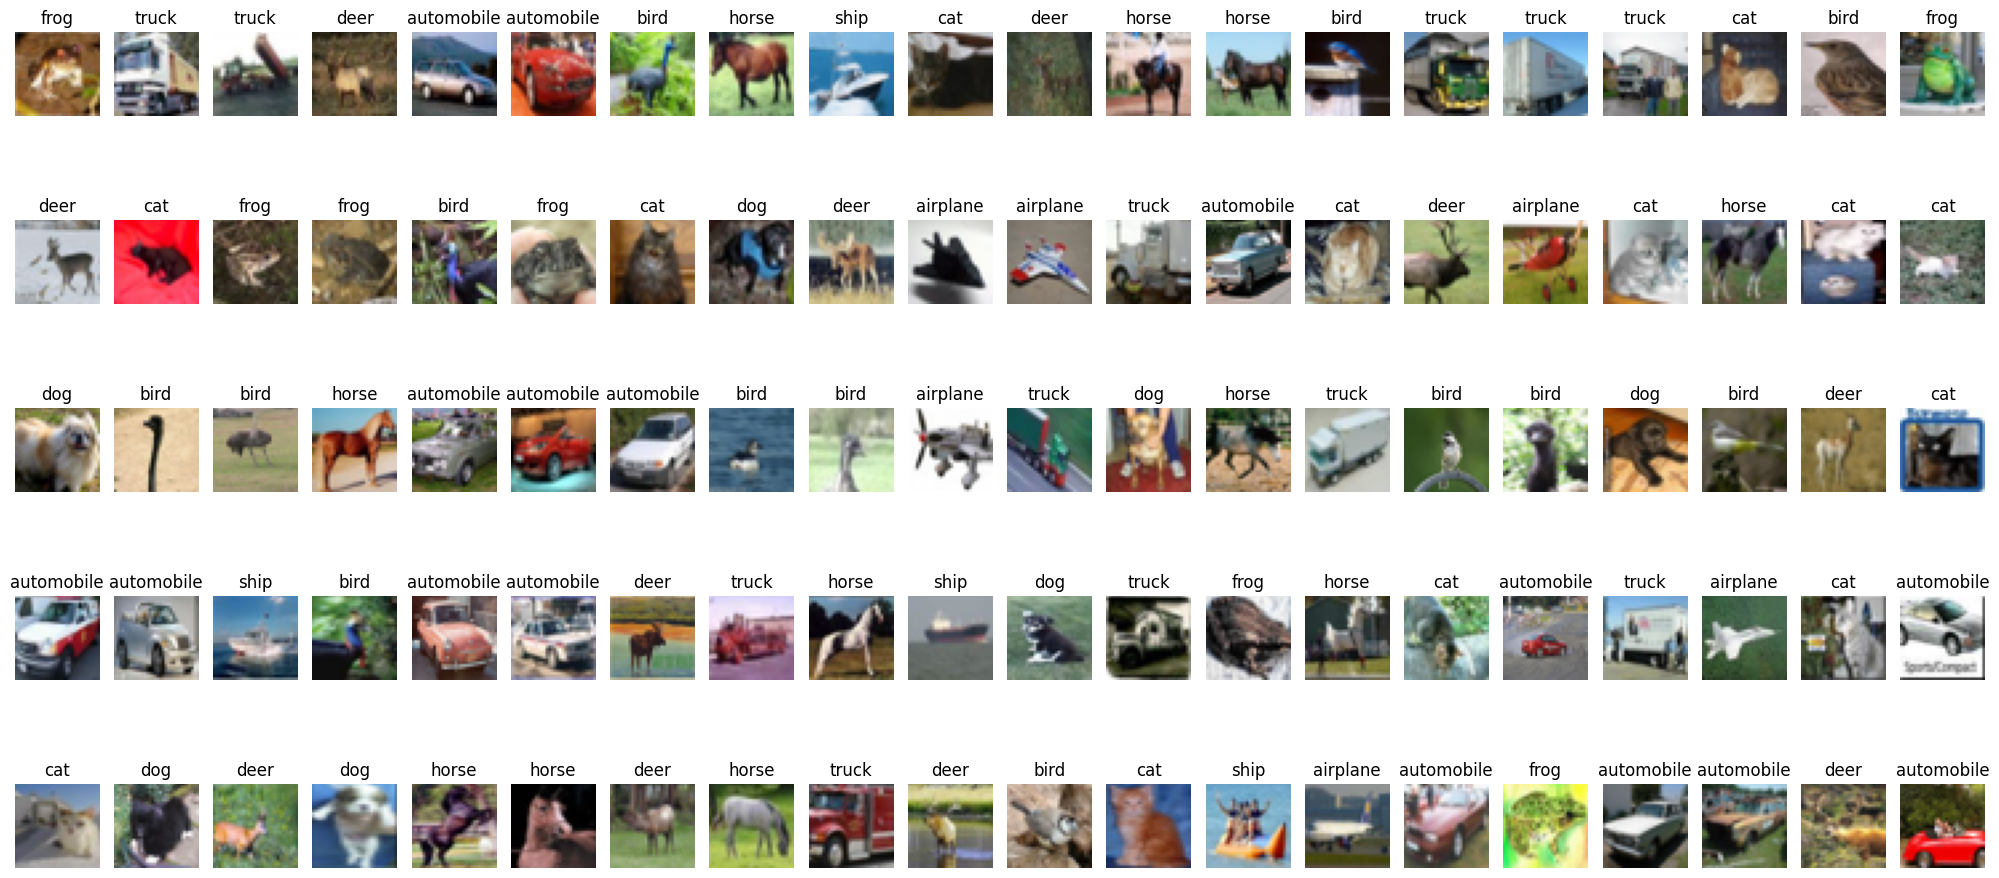

In [8]:
showImages(x_train, y_train, 100)

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(128, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=0.2),

        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    loss=tf.keras.metrics.sparse_categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [12]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4693 - loss: 1.6296 - val_accuracy: 0.6507 - val_loss: 0.9986
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6992 - loss: 0.8506 - val_accuracy: 0.7219 - val_loss: 0.7992
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7647 - loss: 0.6781 - val_accuracy: 0.7179 - val_loss: 0.8310
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8095 - loss: 0.5492 - val_accuracy: 0.7669 - val_loss: 0.6781
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8412 - loss: 0.4549 - val_accuracy: 0.7762 - val_loss: 0.6622
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8674 - loss: 0.3809 - val_accuracy: 0.7713 - val_loss: 0.7348
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8903 - loss: 0.3132 - val_accuracy: 0.7828 - val_loss: 0.7208
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9117 - loss: 

In [13]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [14]:
y_pred = np.argmax(y_pred, axis=1)

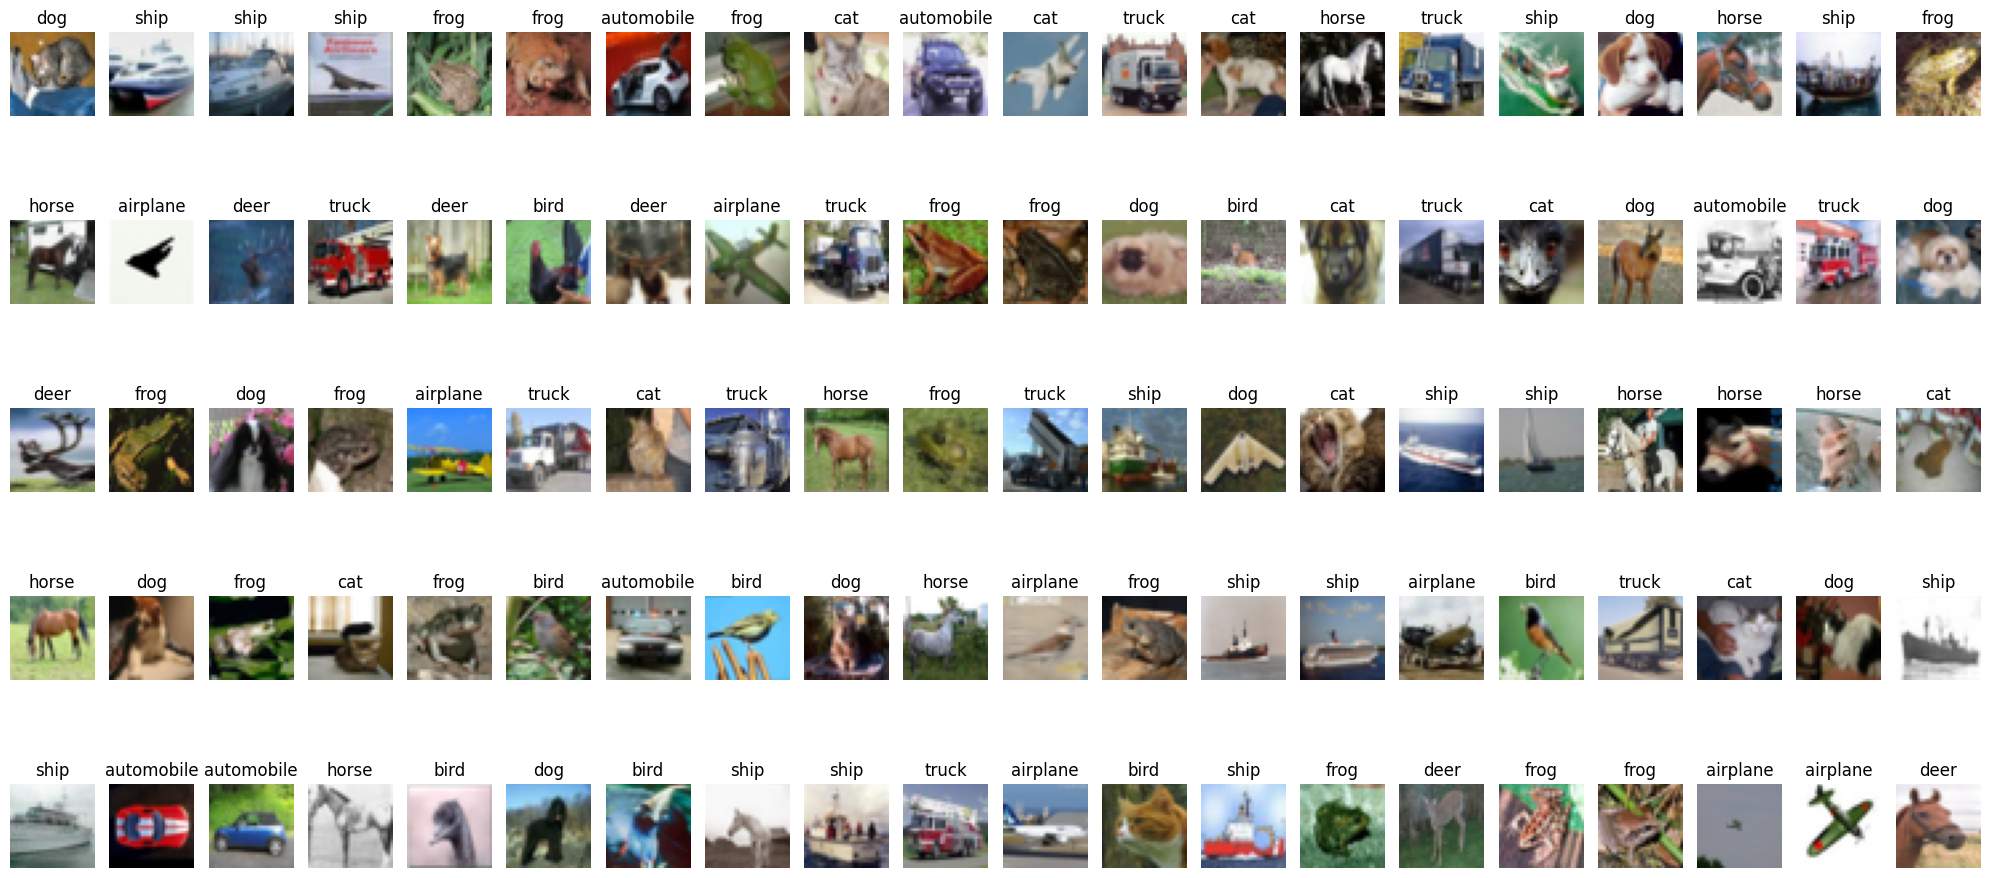

In [15]:
showImages(x_test, y_pred, 100)

In [16]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 1.0598


[1.0349661111831665, 0.8191999793052673]

In [17]:
tf.keras.metrics.Accuracy()(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8191999793052673>

In [18]:
confusion_matrix(y_test, y_pred)

array([[842,  12,  22,  19,  21,  10,   7,   8,  31,  28],
       [ 13, 907,   2,   3,   2,   4,   6,   1,  10,  52],
       [ 37,   1, 727,  40,  70,  57,  35,  17,   8,   8],
       [ 17,   4,  45, 649,  54, 144,  44,  27,   7,   9],
       [ 11,   3,  36,  40, 834,  21,  19,  31,   3,   2],
       [ 10,   0,  26, 123,  33, 770,   9,  22,   1,   6],
       [  5,   1,  32,  60,  41,  21, 833,   2,   4,   1],
       [  9,   1,  18,  18,  42,  38,   4, 860,   1,   9],
       [ 49,  15,   8,  11,   2,   3,   6,   2, 876,  28],
       [ 21,  51,   6,   3,   6,   2,   4,   3,  10, 894]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.91      0.91      0.91      1000
           2       0.79      0.73      0.76      1000
           3       0.67      0.65      0.66      1000
           4       0.75      0.83      0.79      1000
           5       0.72      0.77      0.74      1000
           6       0.86      0.83      0.85      1000
           7       0.88      0.86      0.87      1000
           8       0.92      0.88      0.90      1000
           9       0.86      0.89      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [20]:
model.save('cf100.h5')